# Data Preprocessing

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Dataset

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='a1FK1Sghj0HvpJpqZX37DGnAgSnAP36E8AZlNBGRnXMF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-4sb6ifmqntbrjx'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
print(f'No of Rows in the dataset : {data.shape[0]}')
print(f'No of Columns in the dataset : {data.shape[1]}')

No of Rows in the dataset : 400
No of Columns in the dataset : 9


## Descriptive Statistics

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

## Handling Missing Values

In [8]:
# Remove unwanted feature
data.drop('Serial No.', inplace=True, axis=1)

In [9]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
#rename the column
data = data.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

*The Dataset does not have any null values*

## Check for Categorical columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [14]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

*Data looks pretty clean and in the right data type format.*

## Data Visualization

### Univariate Analysis

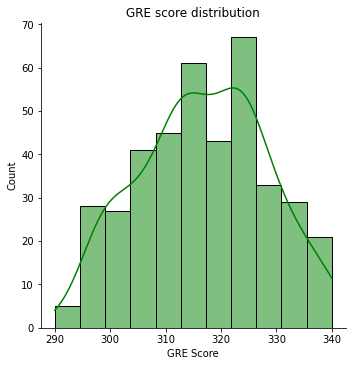

In [15]:
sns.displot(x=data["GRE Score"], kde=True, color='green')
plt.title("GRE score distribution");

Observations for GRE Score :
- Score is distributed in the range of 290 to 340.
- Peaks are observed between 310 to 330 indicating most applicants have scored in this range.

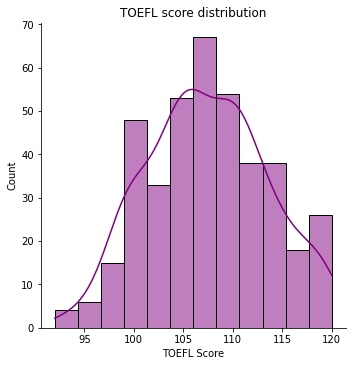

In [16]:
sns.displot(x=data["TOEFL Score"], kde=True, color='purple')
plt.title("TOEFL score distribution");

Observations from TOFEL Score :
- TOFEL scores are distributed in the range of 90 to 120.
- A good number of applicants have scored in between 100 to 115.

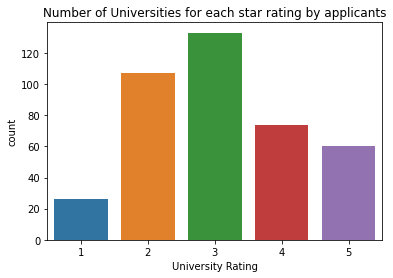

In [17]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

Observations on University rating :
- Close to 130 applicants have marked their university as 3 stars.
- 3 stars are followed by 2 stars for universities.
- 1 star is given by only 30 applicants which is lowest.

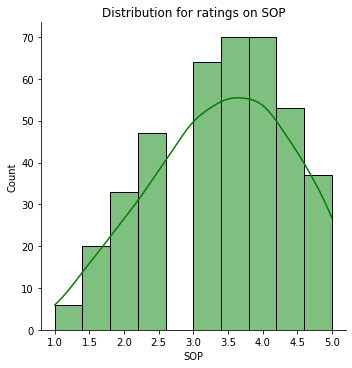

In [18]:
sns.displot(x=data["SOP"], kde=True, color='green');
plt.title("Distribution for ratings on SOP");

Observations from statement of purpose :
- Most of the applicants have received 3.0 to 4.0 stars in their SOP.
- Based on the plot, rating distribution can be bucketed in 3 sections 1.0 to 2.6 as low ratings and 3.0 to 5.0 as high level of ratings.

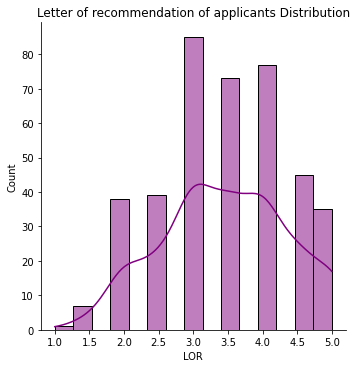

In [19]:
sns.displot(x=data["LOR"], kde=True, color='purple');
plt.title("Letter of recommendation of applicants Distribution");

Observations for LOR :
- Most applicants have a recommendation ratting of 3.0.
- A very good number of applicants are having LOR ratting between 3 to 4 inclusive.

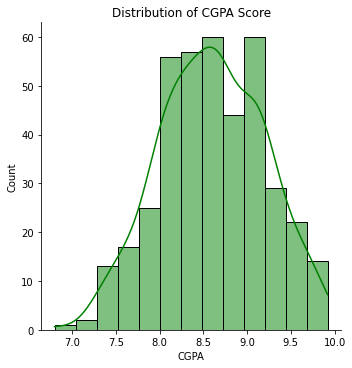

In [20]:
sns.displot(x=data["CGPA"], kde=True, color='green');
plt.title("Distribution of CGPA Score");

Observations for CGPA :
- CGPA scores are distributed in range of 6.8 to 9.92 inclusive.
- More than 70 applicants have the CGPA of 8.67.

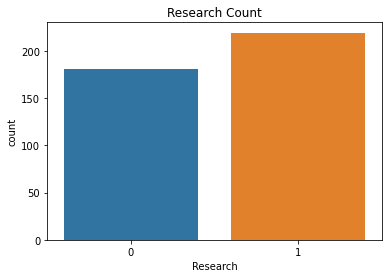

In [21]:
sns.countplot(x=data["Research"]);
plt.title("Research Count");

Observations on Research :
- Out of 400 applicants approx 240 applicants have opened for research.
- In precentage 64% applicants are chosing for research option.

### Bivariate Analysis

In [22]:
cols = data.columns

In [23]:
features = [i for i in data.columns if i != 'Chance of Admit']
label = 'Chance of Admit'

In [24]:
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

[]

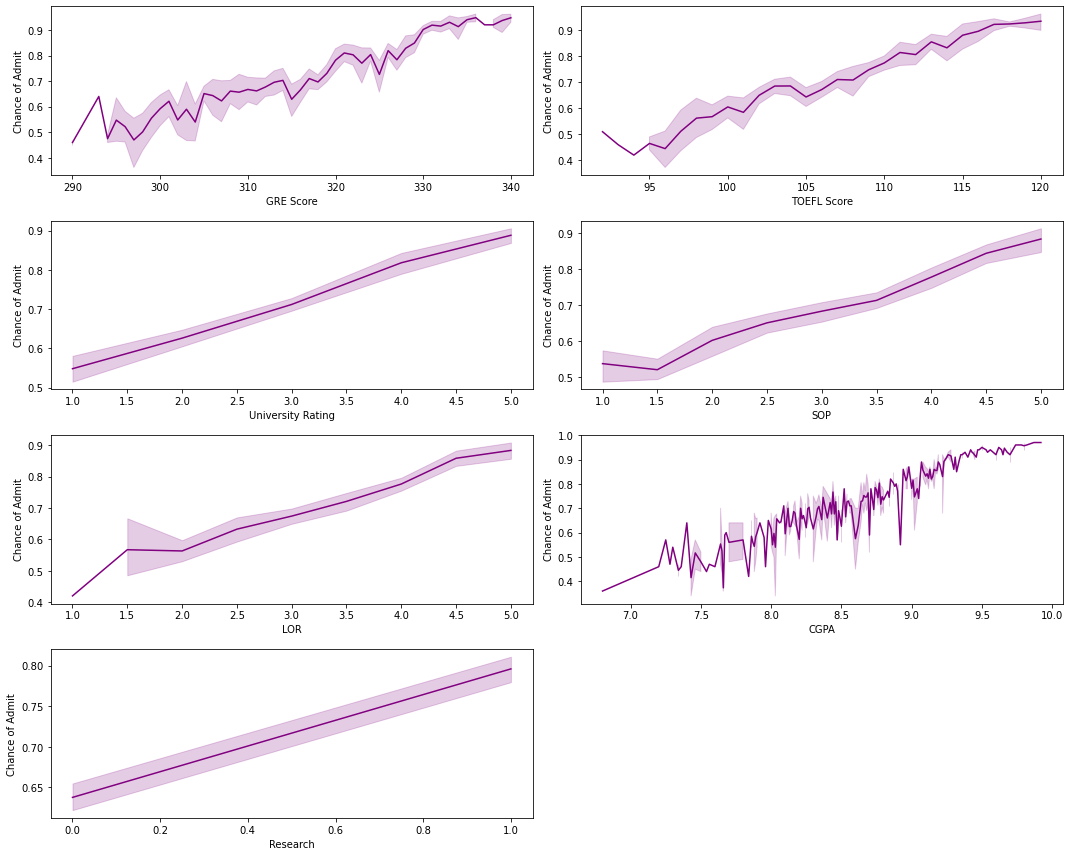

In [25]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.lineplot(x=features[i], y=label, data=data, color='purple')
plt.tight_layout()   
plt.plot()

[]

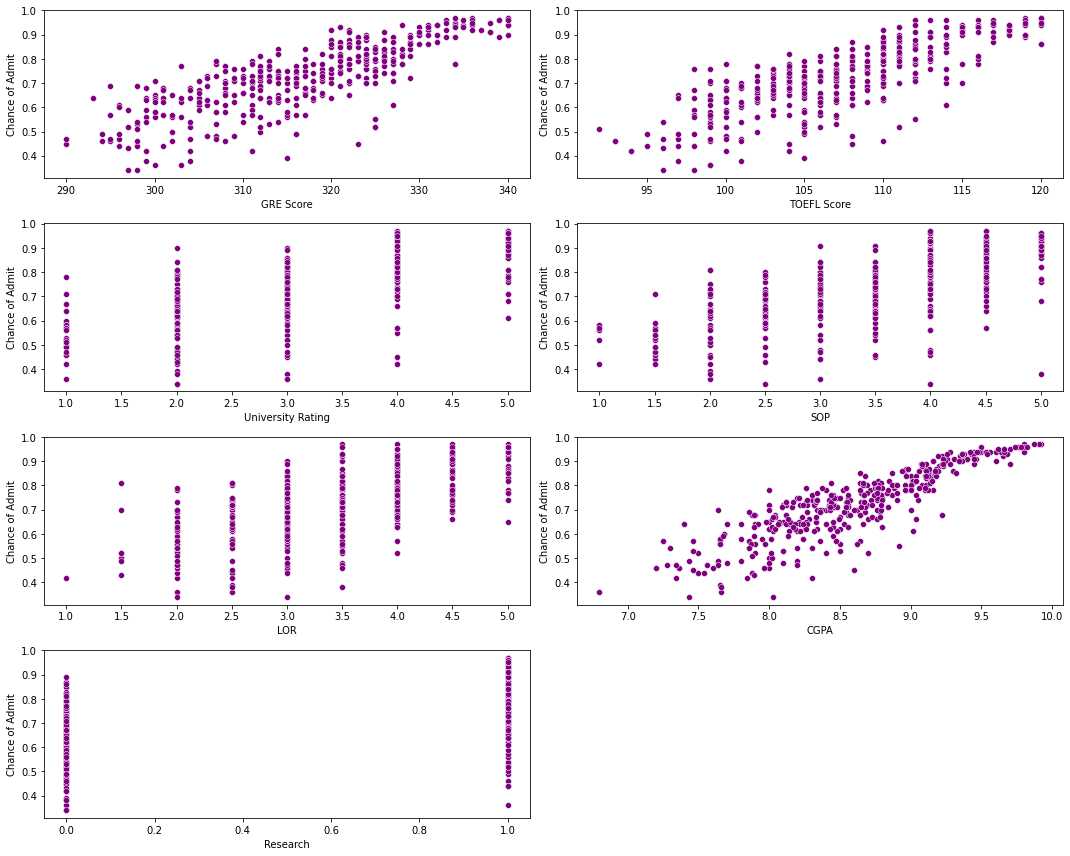

In [26]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=features[i], y=label, data=data, color='purple')
plt.tight_layout()   
plt.plot()

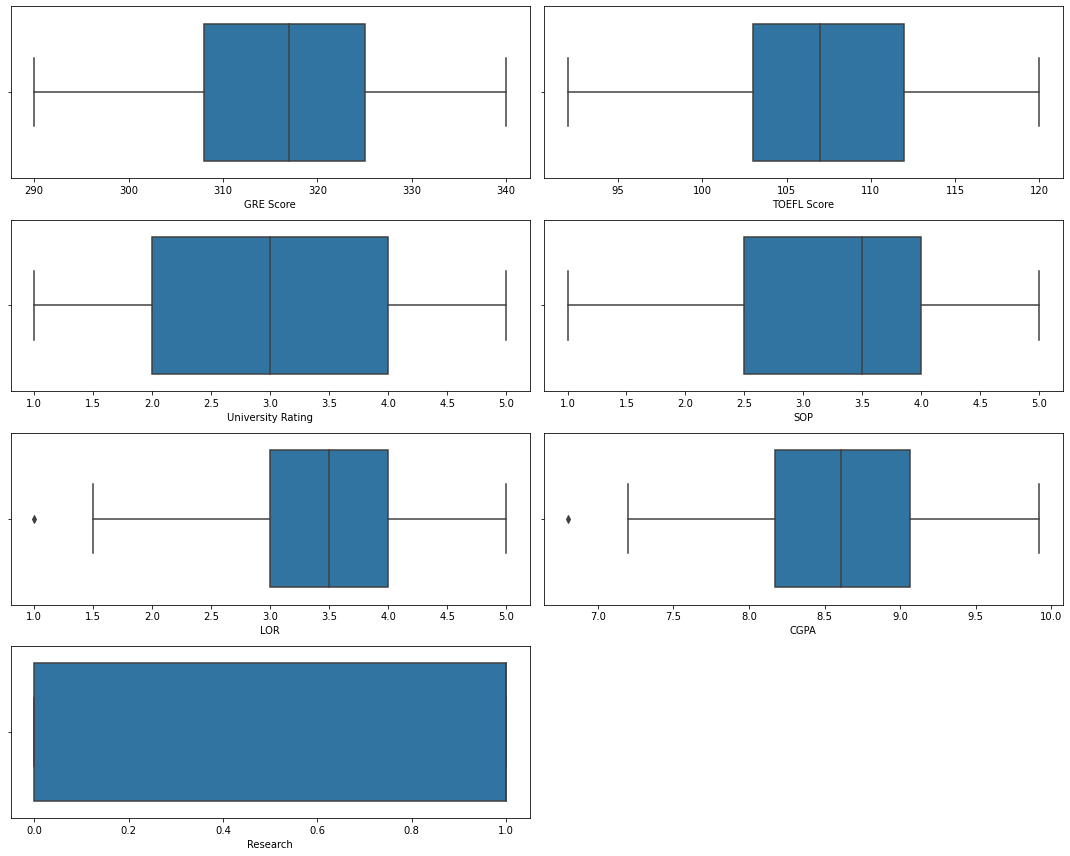

In [27]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=data[features[i]])
plt.tight_layout()

Observations based on above box plot :
- The outlier observed in boxplot is basically just one applicant having
    - the lowest LOR rating of 1.
    - the lowest CGPA score is 6.8

### Multi-Variate Analysis

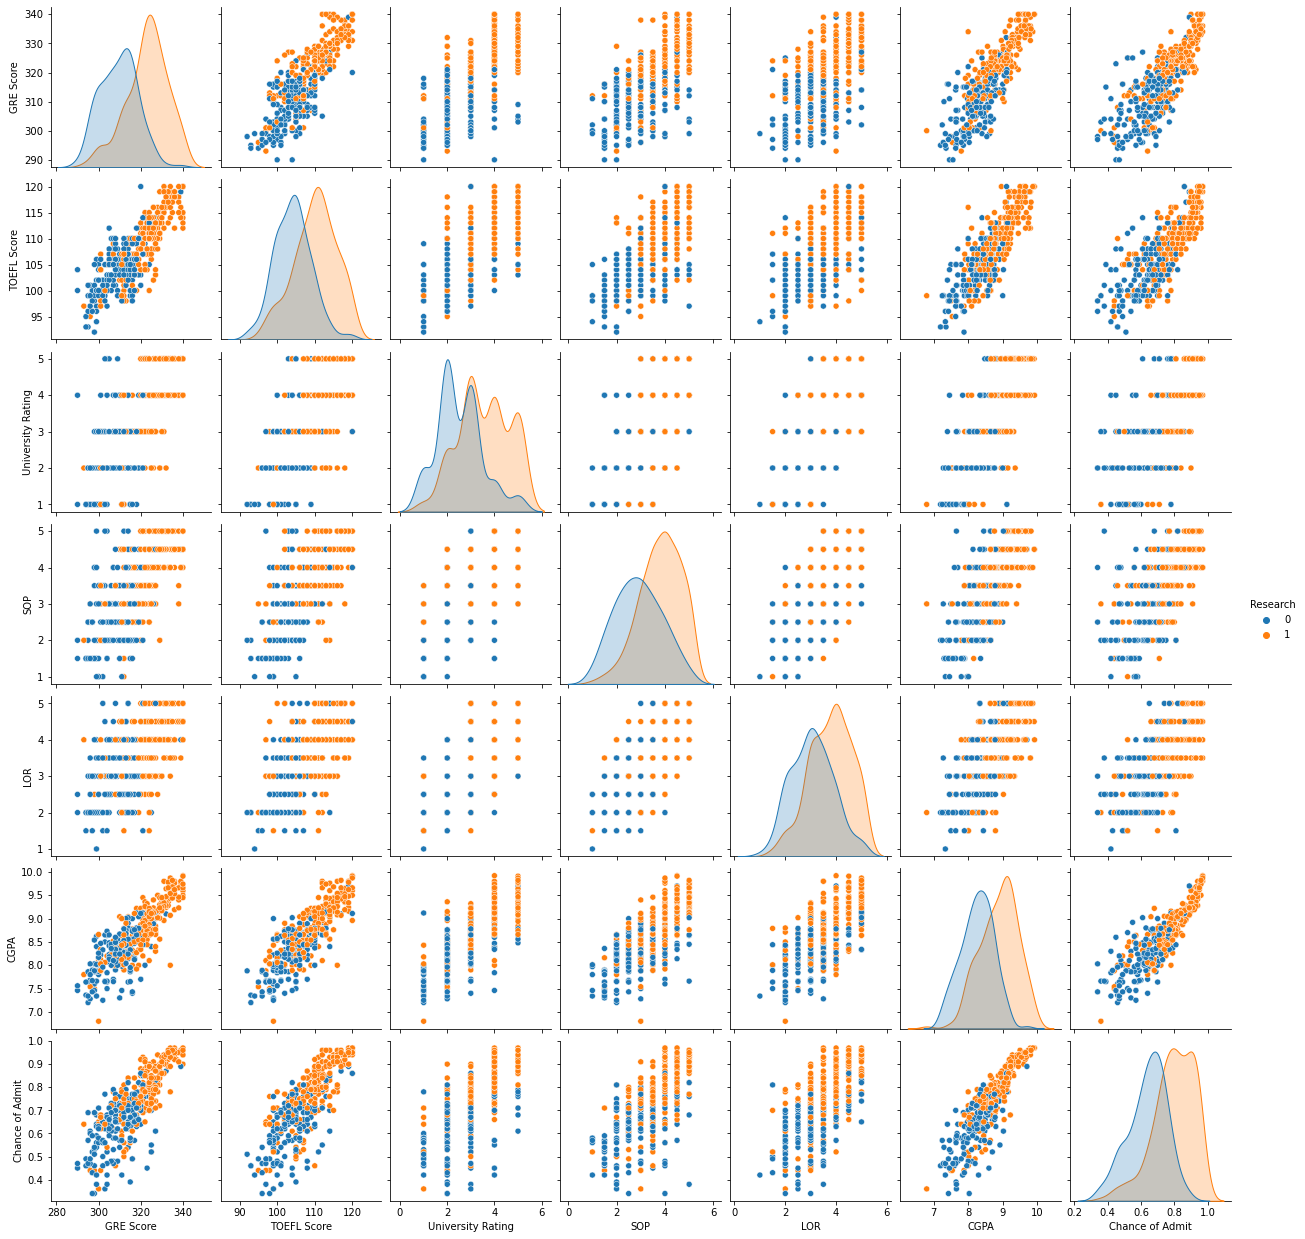

In [28]:
sns.pairplot(data,hue='Research')

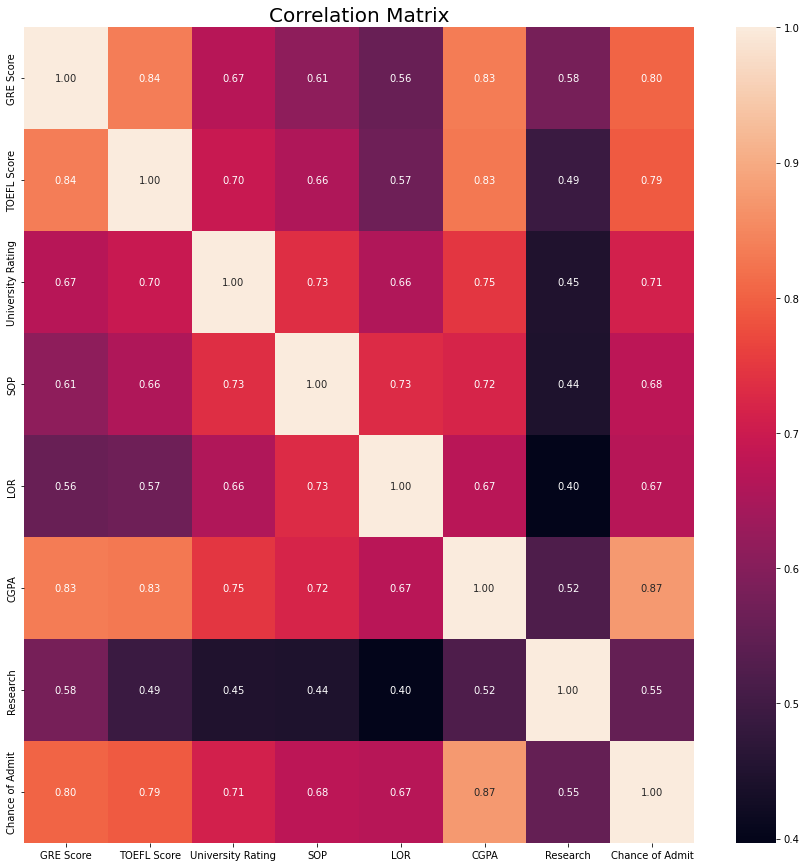

In [29]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

## Split the data into dependent and independent variables

In [30]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
x = data.iloc[:,0:7]
y = data['Chance of Admit']

In [32]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [33]:
y.head().to_frame()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [34]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [35]:
print(f'y contains: {y.shape}')

y contains: (400,)


## Scale the independent variables

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [37]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [38]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


## Split the data into training and testing

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
print(f'x_train contains: {x_train.shape[0]} rows and {x_train.shape[1]} columns')
print(f'x_test contains: {x_test.shape[0]} rows and {x_test.shape[1]} columns')

x_train contains: 320 rows and 7 columns
x_test contains: 80 rows and 7 columns


In [41]:
print(f'y_train contains: {y_train.shape}')
print(f'y_test contains: {y_test.shape}')

y_train contains: (320,)
y_test contains: (80,)


In [42]:
y_train_target = [1 if each > 0.8 else 0 for each in y_train]
y_test_target = [1 if each > 0.8 else 0 for each in y_test]

To convert this test label of probability as either 1 or 0
- 1 means Yes
- 0 means No

# Model Building

##  Training And Testing The Model

**Linear Support Vector Classification**

In [43]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(x_train,y_train_target)

CalibratedClassifierCV(base_estimator=LinearSVC())

**Linear Regression**

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Save a model to the repository

In [45]:
!pip install ibm_watson_machine_learning

In [46]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Ba1rsbBXQDZJzM50_I8GR6Qon8VzcFbMxEb_jpiJuEGw"
}
client = APIClient(wml_credentials)

In [47]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [48]:
space_uid = guid_from_space_name(client, 'IBM Project')
print("Space UID = " + space_uid)

Space UID = c117a944-07d6-4a0a-ba3a-9775c85322bd


In [49]:
client.set.default_space(space_uid)

'SUCCESS'

## Get the software specification

In [50]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [51]:
software_spec_id =  client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
print(software_spec_id)

12b83a17-24d8-5082-900f-0ab31fbfd3cb


## Store the model

In [52]:
model_details = client.repository.store_model(model=model_svm,meta_props={
client.repository.ModelMetaNames.NAME:"UAEP",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_id }
                                          )
model_id = client.repository.get_model_id(model_details)

In [53]:
print(model_id)

7f562331-bd9b-48f4-a865-82559a27be53


In [54]:
model_details2 = client.repository.store_model(model=lr,meta_props={
client.repository.ModelMetaNames.NAME:"UAEP2",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_id }
                                          )
model_id2 = client.repository.get_model_id(model_details2)

In [55]:
print(model_id2)

e976353d-075e-4bcd-94b6-cef634424857
